In [1]:
import json
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score

# 1) Point this to your results.json
results_path = r"C:\Users\badri\OneDrive\Documents\EE 675 Neural Learning\Baseline Replication\PopulationTransformer\outputs\sub_1_word_onset_top1_popt_brainbert_stft\results.json"

with open(results_path, "r") as f:
    data = json.load(f)

preds = np.array(data["predicts"], dtype=float)
labels = np.array(data["labels"], dtype=int)

print("Sanity ROC AUC (should match ~0.5293):", roc_auc_score(labels, preds))

best_f1 = 0.0
best_t = 0.5

for t in np.linspace(0.1, 0.9, 81):
    y_hat = (preds >= t).astype(int)
    f1 = f1_score(labels, y_hat)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("Best threshold:", best_t)
print("Best F1:", best_f1)

Sanity ROC AUC (should match ~0.5293): 0.5293352486737775
Best threshold: 0.1
Best F1: 0.6629570747217806


In [12]:
import json
import numpy as np
from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve

# 1. Load results.json from your idx02 run
results_path = r"C:\Users\badri\OneDrive\Documents\EE 675 Neural Learning\Baseline Replication\PopulationTransformer\outputs\sub_1_sentence_onset_top1_popt_brainbert_stft_sentence_onset_idx05\results.json"

with open(results_path, "r") as f:
    res = json.load(f)

preds = np.array(res["predicts"], dtype=float)
labels = np.array(res["labels"], dtype=int)

print("---- Basic metrics ----")
print("ROC AUC in file:   ", res.get("roc_auc"))
print("Recomputed ROC AUC:", roc_auc_score(labels, preds))

# 2. Sweep thresholds and find best F1
thresholds = np.linspace(0.1, 0.9, 81)
best_f1 = -1.0
best_t = None
f1s = []

for t in thresholds:
    y_hat = (preds >= t).astype(int)
    f1 = f1_score(labels, y_hat, zero_division=0)
    f1s.append(f1)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("\n---- Threshold sweep ----")
print("Best threshold:", best_t)
print("Best F1:       ", best_f1)

# 3. Also compute precision/recall vs threshold using sklearn
precisions, recalls, pr_thresholds = precision_recall_curve(labels, preds)

print("\n---- Precision-Recall summary ----")
print("Number of PR thresholds:", len(pr_thresholds))
print("Example: t=%.3f -> precision=%.3f, recall=%.3f"
      % (pr_thresholds[len(pr_thresholds)//2],
         precisions[len(pr_thresholds)//2],
         recalls[len(pr_thresholds)//2]))

---- Basic metrics ----
ROC AUC in file:    0.5498805542283803
Recomputed ROC AUC: 0.5498805542283803

---- Threshold sweep ----
Best threshold: 0.48
Best F1:        0.6190476190476191

---- Precision-Recall summary ----
Number of PR thresholds: 291
Example: t=0.510 -> precision=0.514, recall=0.577



Saved plots:
 - f1_vs_threshold.png
 - precision_recall_vs_threshold.png


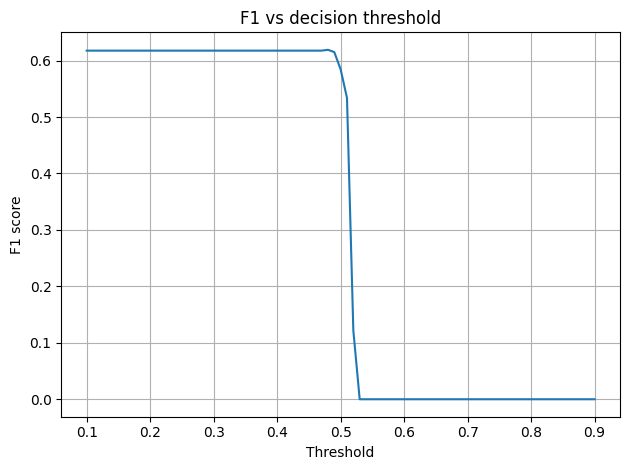

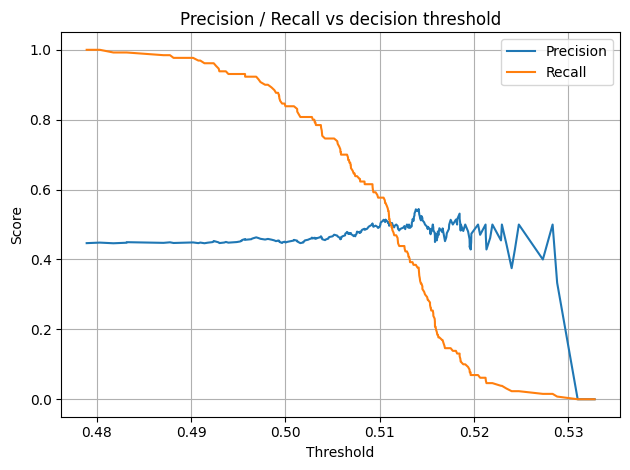

In [13]:
import matplotlib.pyplot as plt

# 4. Plot F1 vs threshold
plt.figure()
plt.plot(thresholds, f1s)
plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.title("F1 vs decision threshold")
plt.grid(True)
plt.tight_layout()
plt.savefig("f1_vs_threshold.png", dpi=150)

# 5. Plot precision & recall vs threshold (from precision_recall_curve)
plt.figure()

# pr_thresholds has length = len(precisions) - 1
# We'll ignore the last precision/recall point (threshold doesn't exist for it)
plt.plot(pr_thresholds, precisions[:-1], label="Precision")
plt.plot(pr_thresholds, recalls[:-1], label="Recall")

plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision / Recall vs decision threshold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("precision_recall_vs_threshold.png", dpi=150)

print("\nSaved plots:")
print(" - f1_vs_threshold.png")
print(" - precision_recall_vs_threshold.png")


In [ ]:
import matplotlib.pyplot as plt

plt.hist(preds, bins=50)
plt.title("Distribution of PopT predictions")
plt.xlabel("Predicted probability")
plt.ylabel("Count")
plt.savefig("pred_hist.png", dpi=150)

0
True     4205
False    4205
Name: count, dtype: int64


<Axes: xlabel='0'>

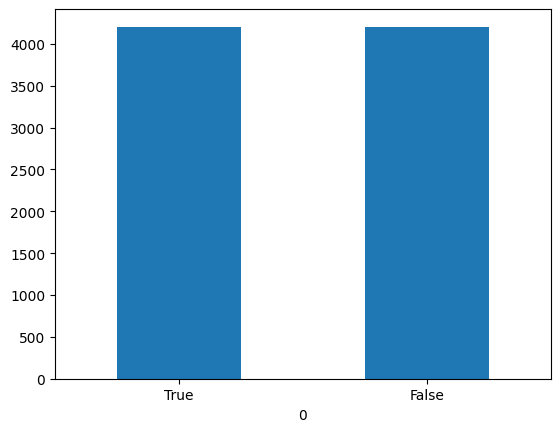

In [15]:
import pandas as pd

base = r"C:\Users\badri\OneDrive\Documents\EE 675 Neural Learning\Baseline Replication\PopulationTransformer\saved_examples\sub_1_word_onset_cr_idx06"

labels = pd.read_csv(fr"{base}\labels.tsv", sep="\t", header=None)
print(labels[0].value_counts())

labels[0].value_counts().plot(kind="bar", rot=0)

In [9]:

from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve

path = r"C:\Users\badri\OneDrive\Documents\EE 675 Neural Learning\Baseline Replication\PopulationTransformer\outputs\sub_1_sentence_onset_top1_popt_brainbert_stft_sentence_onset_idx05\results.json"

import numpy as np

data   = np.load(path)
logits = data["logits"].astype(float).ravel()
labels = data["labels"].astype(int).ravel()

probs  = 1 / (1 + np.exp(-logits))

print("ROC AUC:", roc_auc_score(labels, probs))

best_f1 = 0.0
best_t  = 0.5
for t in np.linspace(0.1, 0.9, 81):
    f1 = f1_score(labels, (probs >= t).astype(int))
    if f1 > best_f1:
        best_f1 = f1
        best_t  = t

print("Best threshold:", best_t)
print("Best F1:", best_f1)

prec, rec, th = precision_recall_curve(labels, probs)
mid = len(th) // 2
print(f"Example: t={th[mid]:.3f} -> precision={prec[mid]:.3f}, recall={rec[mid]:.3f}")

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [7]:
import os
import pandas as pd

base = r"C:\Users\badri\OneDrive\Documents\EE 675 Neural Learning\Baseline Replication\PopulationTransformer\saved_examples\sub_1_sentence_onset_cr_idx10"

labels_path   = os.path.join(base, "labels.tsv")
manifest_path = os.path.join(base, "manifest.tsv")

# labels.tsv in your upload has a weird header ("True", "7292128"), so ignore the header:
labels = pd.read_csv(labels_path, sep="\t", header=None, names=["is_onset", "window_index"])
manifest = pd.read_csv(manifest_path, sep="\t")

print(labels.head())
print(manifest.head())
print(len(labels), len(manifest))


   is_onset  window_index
0      True       7292128
1      True      13930671
2      True      13478097
3      True      14120284
4      True       4456993
  C:\Users\badri\OneDrive\Documents\EE 675 Neural Learning\Baseline Replication\PopulationTransformer/saved_examples/all_test_sentence_onset_idx10\sub_1\trial002\0.npy  \
0  C:\Users\badri\OneDrive\Documents\EE 675 Neura...                                                                                                                      
1  C:\Users\badri\OneDrive\Documents\EE 675 Neura...                                                                                                                      
2  C:\Users\badri\OneDrive\Documents\EE 675 Neura...                                                                                                                      
3  C:\Users\badri\OneDrive\Documents\EE 675 Neura...                                                                                                            

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

label = pd.read_csv(r"C:\Users\badri\OneDrive\Documents\EE 675 Neural Learning\Baseline Replication\PopulationTransformer\saved_examples\sub_1_sentence_onset_cr_idx10\labels.tsv", sep="\t")

plt.figure(figsize=(14,3))
plt.plot(labl["label"].values, ".", markersize=3)
plt.title("Sentence onset labels over time")
plt.xlabel("Window index")
plt.ylabel("Label (0/1)")
plt.show()

print(lbl["label"].mean())

KeyError: 'label'

<Figure size 1400x300 with 0 Axes>

---- Basic metrics ----
ROC AUC in file:    0.5335825538123947
Recomputed ROC AUC: 0.5335825538123947

---- Threshold sweep ----
Best threshold: 0.1
Best F1:        0.6682501979414094


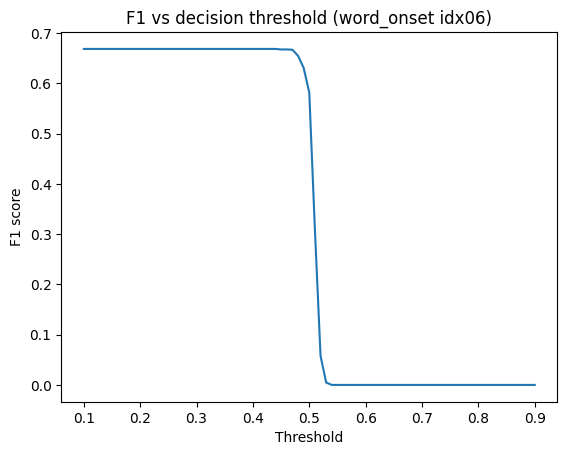

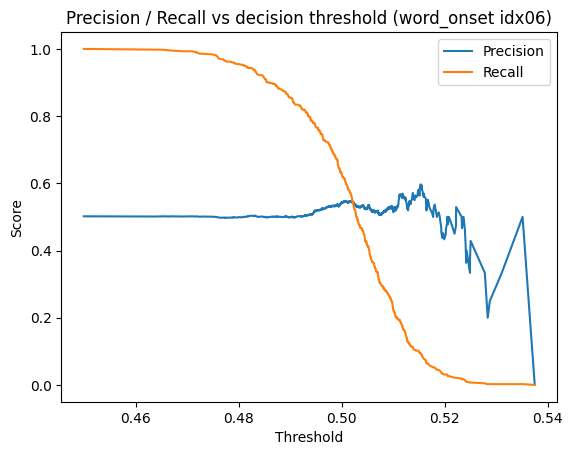


---- Precision-Recall summary ----
Number of PR thresholds: 841
Example: t=0.502 -> precision=0.544, recall=0.543


In [20]:
import json
import numpy as np
from sklearn.metrics import roc_auc_score, f1_score, precision_recall_curve
import matplotlib.pyplot as plt

# 1) Load results.json
results_path = r"C:\Users\badri\OneDrive\Documents\EE 675 Neural Learning\Baseline Replication\PopulationTransformer\outputs\sub_1_word_onset_top1_popt_brainbert_stft_word_onset_idx06\results.json"

with open(results_path, "r") as f:
    results = json.load(f)

y_true = np.array(results["labels"])
y_score = np.array(results["predicts"])

print("---- Basic metrics ----")
auc_file = results["roc_auc"]
print("ROC AUC in file:   ", auc_file)
print("Recomputed ROC AUC:", roc_auc_score(y_true, y_score))

# 2) Threshold sweep for F1
thresholds = np.linspace(0.1, 0.9, 81)
best_f1 = -1.0
best_t = None
f1_vals = []

for t in thresholds:
    y_pred = (y_score >= t).astype(int)
    f1 = f1_score(y_true, y_pred)
    f1_vals.append(f1)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("\n---- Threshold sweep ----")
print("Best threshold:", best_t)
print("Best F1:       ", best_f1)

# F1 vs threshold plot
plt.figure()
plt.plot(thresholds, f1_vals)
plt.xlabel("Threshold")
plt.ylabel("F1 score")
plt.title("F1 vs decision threshold (word_onset idx06)")
plt.show()

# 3) Precision–recall around the best threshold
precision, recall, pr_thresholds = precision_recall_curve(y_true, y_score)

plt.figure()
plt.plot(pr_thresholds, precision[:-1], label="Precision")
plt.plot(pr_thresholds, recall[:-1], label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision / Recall vs decision threshold (word_onset idx06)")
plt.show()

print("\n---- Precision-Recall summary ----")
print("Number of PR thresholds:", len(pr_thresholds))
mid = len(pr_thresholds) // 2
print(f"Example: t={pr_thresholds[mid]:.3f} -> precision={precision[mid]:.3f}, recall={recall[mid]:.3f}")